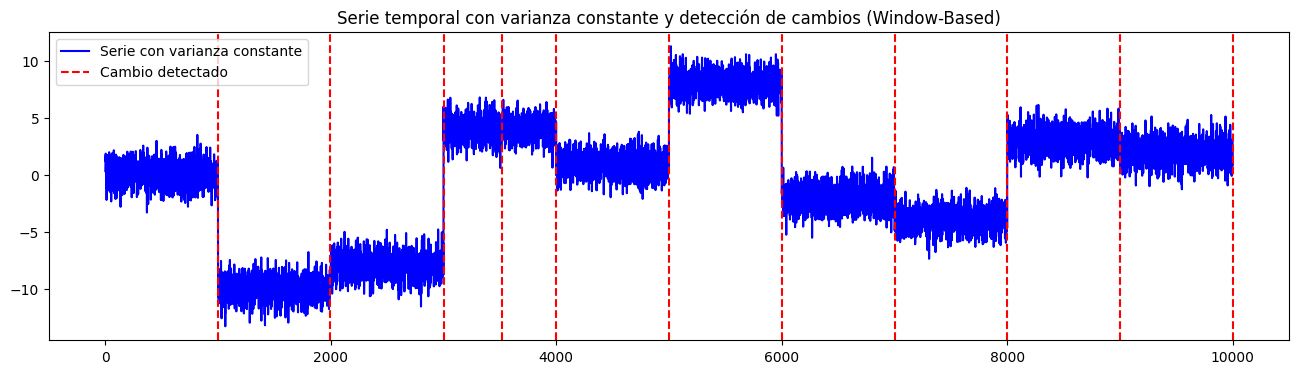

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

# Función para generar una serie con VARIANZA CONSTANTE
def serieVarianzaConstante(num_segmentos, tamano_segmento):
    serie = np.concatenate([
        np.random.normal(np.random.randint(-10, 10), 1, tamano_segmento)  
        for _ in range(num_segmentos) 
    ])
    return pd.Series(serie)

# Generar la serie
serie1 = serieVarianzaConstante(10, 1000)

# Convertir la serie en un array numpy
serie1_np = serie1.values.reshape(-1, 1)

# Aplicar Window-based con el modelo "rbf"
algo = rpt.Window(width=100, model="rbf").fit(serie1_np)

# Obtener los cambios (ici on demande n_bkps ruptures)
cambios_varianza = algo.predict(n_bkps=10)

# Graficar la serie y los cambios en un solo gráfico
plt.figure(figsize=(16, 4))
plt.plot(serie1, label="Serie con varianza constante", color='blue')

# Dibujar líneas verticales en los puntos de cambio detectados
for cambio in cambios_varianza:
    plt.axvline(x=cambio, color='red', linestyle='--', label="Cambio detectado" if cambio == cambios_varianza[0] else None)

plt.title("Serie temporal con varianza constante y detección de cambios (Window-Based)")
plt.legend()
plt.show()


### 📊  Observaciones sobre Window

El algoritmo **Window** fue capaz de detectar todos los ** puntos de cambio** en la serie
temporal con **varianza constante**, esto confirma la efectividad del método. 
